# Reconnaissance de chiffres - Réseaux convolutionnels

Objectif : Dans ce TP, nous allons construire des algorithmes de Deep Learning pour tenter de reconnaître des chiffres manuscrits.

__Rappel__ : En apprentissage automatique, un réseau de neurones convolutifs ou réseau de neurones à convolution (en anglais CNN ou ConvNet pour Convolutional Neural Networks) est un type de réseau de neurones artificiels acycliques (feed-forward), dans lequel le motif de connexion entre les neurones est inspiré par le cortex visuel des animaux. Les neurones de cette région du cerveau sont arrangés de sorte qu'ils correspondent à des régions qui se chevauchent lors du pavage du champ visuel1. Leur fonctionnement est inspiré par les processus biologiques2, ils consistent en un empilage multicouche de perceptrons, dont le but est de prétraiter3 de petites quantités d'informations. Les réseaux neuronaux convolutifs ont de larges applications dans la reconnaissance d'image et vidéo, les systèmes de recommandation4 et le traitement du langage naturels.

Nous entrons ici dans l'apprentissage dit 'supervisé' cat le jeu d'entrainement nous informe de la classe du chiffre à prédire (le label)

Nous allons utiliser le jeu de référence du MNIST pour la classification des chiffres. Ce dataset MNIST contient 60000 images en niveaux de grille de résolution 28x28, représentant les 10 chiffres de 0 à 9, ainsi qu'un jeu de test de 10000 images.

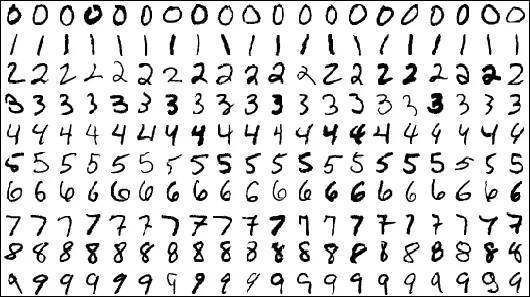

Dans l’image ci-dessus, pour chaque chiffre, on a sa représentation sous forme d’image ainsi que son étiquette. Par exemple, pour le dernier chiffre en bas à droit, l’étiquette vaut 9 vu qu’il s’agit du chiffre 9.  

La représentation de ces chiffres est normalisée à travers tout le jeu de données MNIST. Ainsi, chaque chiffre est codé dans un format 8 pixels * 8 pixels. De plus, chaque pixel peut prendre une valeur de 0 à 255. Cette plage de valeurs représente le niveau de gris Grayscale. En d’autres terme, chaque représentation d’une image est une matrice de dimension 8*8.  

Le jeu de données MNIST présent par défaut dans la librairie Scikit Learn, comporte un sous-ensemble de la “vraie” base de données MNIST. Le sous-ensemble comporte 1797 chiffres que nous diviserons par la suite en deux sous ensembles : d’entrainement et de test.

## Introduction

1. Import des bibliothèques

In [39]:
#!pip install tensorflow==2.2

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from keras import backend as K
import keras

2. Chargement des données

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

3. Affichage du dataset

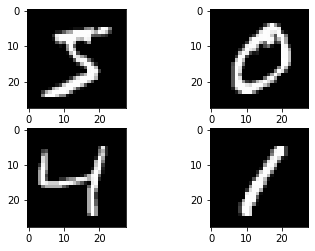

In [42]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

4. Redimensionnement de la matrice de données

In [43]:
subset=10000 #size
nb_classes=10
X_train = X_train[:subset].reshape(subset, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train[:subset], nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

*Question* : De quelles tailles sont les vecteurs X_train et Y_train ?

## Premier réseau de neurones

Construisons notre premier réseau de neurones.

Pour cela, nous allons créer un modèle Keras en utilisant l'api Sequential:
    - model = Sequential()

Puis utiliser les méthodes suivantes de Keras pour ajouter des couches à ce modèle :

    - model.add(Dense(nbhiden, [input_shape=(nbinput,1)], [activation='activationfunction'])) : ajoute une couche cachée au réseau de neurones. nbhidden est le nombre de neurones de la couche. [input_shape=(nbinput,)] correspond à la dimension de l'entrée, [activation='activationfunction'] est la fonction d'activation
    - model.add(Dropout(value)) : applique un dropout à la couche, pour éviter le surapprentissage

6. Création du modèle

Créer le modèles avec les paramètres suivants :    
         * 784 dimensions en entrée   
         * 12 dense et activation relu (sigmoid)   
         * 12 dense et activation relu (sigmoid)   
         * dropout 0.5 => 10 sorties (fonction d'activation = softmax)  

In [50]:
model = Sequential()
model.add(Dense(12, input_shape=(784,),activation='sigmoid'))
model.add(Dense(12,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

In [51]:
# Compilation du modèle
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                9420      
_________________________________________________________________
dense_9 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                130       
Total params: 9,706
Trainable params: 9,706
Non-trainable params: 0
_________________________________________________________________


7. APprentissage du modèle

In [46]:
batch_size = 256
epochs=20
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
40/40 [==============================] - 1s 8ms/step - loss: 2.4017 - accuracy: 0.1119 - val_loss: 2.2396 - val_accuracy: 0.3903
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 2.2272 - accuracy: 0.1822 - val_loss: 2.0182 - val_accuracy: 0.4567
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 1.9968 - accuracy: 0.2739 - val_loss: 1.5910 - val_accuracy: 0.5483
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 1.6887 - accuracy: 0.3580 - val_loss: 1.3131 - val_accuracy: 0.5261
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 1.5028 - accuracy: 0.4174 - val_loss: 1.1667 - val_accuracy: 0.6516
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 1.3827 - accuracy: 0.4665 - val_loss: 1.0628 - val_accuracy: 0.6803
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 1.3157 - accuracy: 0.4921 - val_loss: 0.9998 - val_accuracy: 0.6818
Epoch 8/20
40/40 [==

Comment intéreprêter le/les résultat(s)? Que pouvez-vous dire du modèle ?

8. Evaluation du modèle sur un exemple

The accuracy on the test set is  84.60000157356262 %


TypeError: Invalid shape (784,) for image data

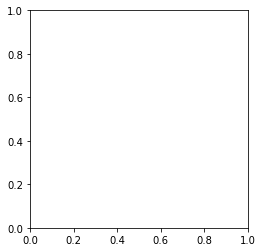

In [47]:
def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss,acc = model.evaluate(X_test, y_test,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')
plot_mnist_digit(X_test[index])
cl=model.predict_classes(X_test[index].reshape((1,784)))

print("le chiffre reconnu est: ", cl[0])
print("le chiffre à reconnaitre  est: ", np.argmax(y_test[index]))

## CNN

Nous allons utilisé dans cette partie majoritairement Keras. En plus des fonctions vues précédemment, en voici deux qui vous seront utiles :  
    - model.add(Conv2D(filters, kernel_size=(size, size), [activation='activation_function'], [input_shape=input_shape])) : ajoute une couche de convolution au réseau de neurones. filters est le nombre de filtres de convolution. kernel_size est la taille des filtres de convolution.
    - model.add(MaxPooling2D(pool_size=(psize, psize))) : ajoute une couche de max pooling. pool_size est la taille de la fenêtre de pooling.

In [ ]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:subset].reshape(x_train[:subset].shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train[:subset], nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

9. Création du modèle CNN

Créer le modèles avec les paramètres suivants :

     * input_shape dimensions en entrée,  4 filtres de convolution 3x3 et activation relu 
     * maxpooling 2x2
     * dropout 0.25 
     * flatten
     * 10 dense  et actviation relu 
     * dropout 0.5
     * 10 sorties (fonction d'activation = softmax) 

In [55]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))²
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

In [56]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 676)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                6770      
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

10. Apprentissage du modèle

In [57]:
batch_size = 256
epochs=20
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
40/40 [==============================] - 1s 21ms/step - loss: 2.1421 - accuracy: 0.1991 - val_loss: 1.0219 - val_accuracy: 0.7106
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 1.5012 - accuracy: 0.4176 - val_loss: 0.8293 - val_accuracy: 0.7789
Epoch 3/20
40/40 [==============================] - 1s 16ms/step - loss: 1.3543 - accuracy: 0.4628 - val_loss: 0.9328 - val_accuracy: 0.7170
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 1.2931 - accuracy: 0.5140 - val_loss: 0.6953 - val_accuracy: 0.8615
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 1.2337 - accuracy: 0.5300 - val_loss: 0.5310 - val_accuracy: 0.8856
Epoch 6/20
40/40 [==============================] - 1s 16ms/step - loss: 1.1677 - accuracy: 0.5442 - val_loss: 0.4921 - val_accuracy: 0.9070
Epoch 7/20
40/40 [==============================] - 1s 16ms/step - loss: 1.1185 - accuracy: 0.5692 - val_loss: 0.4405 - val_accuracy: 0.9063
Epoch 8/20
40

Le modèle CNN est-il performant ? Pourquoi? Explicitez loss, accuracy.

11. Validation

In [ ]:
#Affiche les prédictions des valeurs
out = model.predict(x_test)
print(np.argmax(out, axis=1))
y_pred = np.argmax(out, axis=1)

In [ ]:
#Affiche les vraies valeurs
print(np.argmax(y_test, axis=1))
y_true = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

*Question* :  quel(s) chiffre(s) est.sont le(s) moins bien prédit(s)?

12. Amélioration

Créer un meilleur réseau de neurones convolutionnel, et l'entraîner
Objectif : avoir le meilleur résultat possible

Vous pouvez par exemple ajouter des couches convolutionnelles et max_pooling, modifier le nombre de convolutions ou leur taille et jouer sur le dropout.